<h1>Импорт библиотек

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result
class TestSumProd(unittest.TestCase):
    def test_sum_prod(self):
        X = [
            np.array([[1, 2], [3, 4]]),
            np.array([[2, 6], [7, 12]])
        ]
        V = [
            np.array([[1], [2]]),
            np.array([[5], [7]])
        ]
        expected = np.array([[57], [130]])
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [16]:
def binarize_matrix(M, threshold):
    result = np.where(M >= threshold, 1, 0)
    return result
class TestBinarizeMatrix(unittest.TestCase):
    def test_binarize_matrix(self):
        M = np.array([[0.1, 0.5, 1.5], [0.7, 2.1, 0.4], [1.0, 0.2, 1.3]])
        threshold = 1.0
        expected_result = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 1]])
        result = binarize_matrix(M, threshold)
        np.testing.assert_array_equal(result, expected_result)
unittest.main(argv=[''], verbosity=2, exit=False)


test_binarize_matrix (__main__.TestBinarizeMatrix) ... ok
test_sum_prod (__main__.TestSumProd) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.009s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [18]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, i]) for i in range(mat.shape[1])]

class TestUniqueElements(unittest.TestCase):

    def test_unique_rows(self):
        mat = np.array([[1, 2, 2], [3, 3, 4], [5, 5, 5]])
        expected_result = [np.array([1, 2]), np.array([3, 4]), np.array([5])]
        result = unique_rows(mat)
        for r, expected in zip(result, expected_result):
            np.testing.assert_array_equal(r, expected)

    def test_unique_columns(self):
        mat = np.array([[1, 2, 2], [3, 3, 4], [5, 5, 5]])
        expected_result = [np.array([1, 3, 5]), np.array([2, 3, 5]), np.array([2, 4, 5])]
        result = unique_columns(mat)
        for r, expected in zip(result, expected_result):
            np.testing.assert_array_equal(r, expected)

unittest.main(argv=[''], verbosity=2, exit=False)


test_binarize_matrix (__main__.TestBinarizeMatrix) ... ok
test_sum_prod (__main__.TestSumProd) ... ok
test_unique_columns (__main__.TestUniqueElements) ... ok
test_unique_rows (__main__.TestUniqueElements) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.016s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

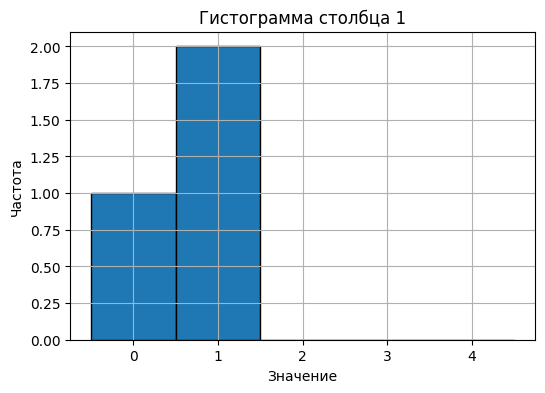

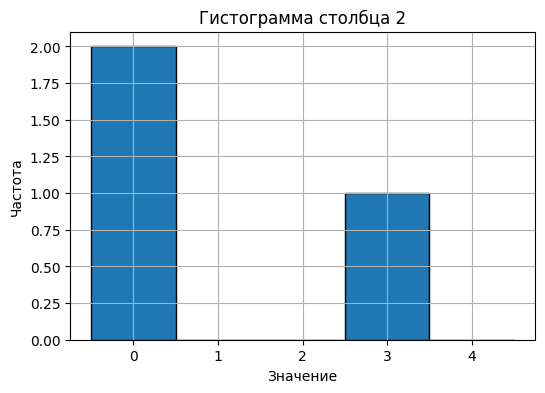

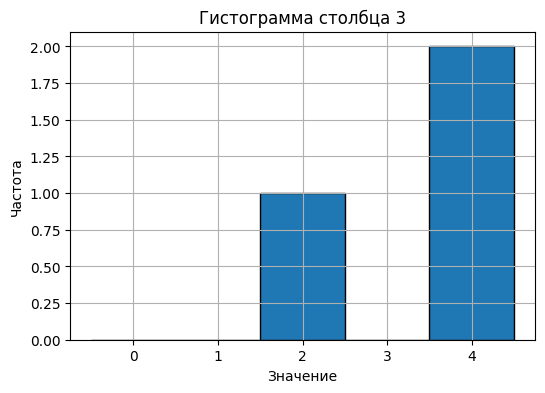

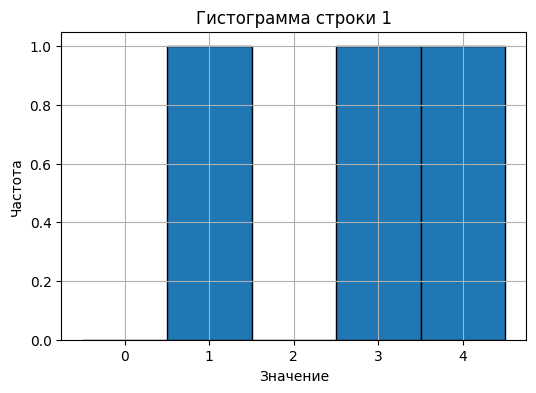

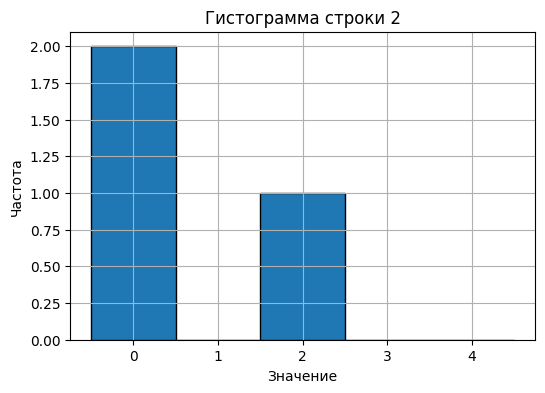

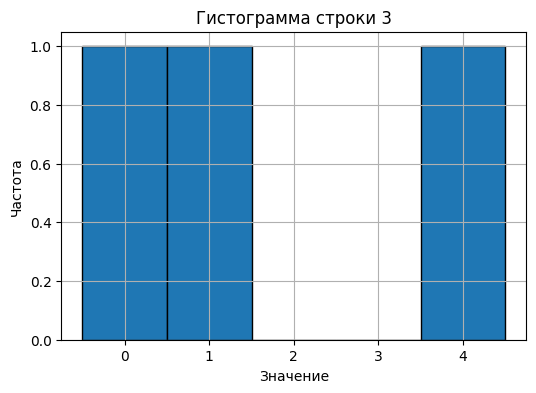

.
----------------------------------------------------------------------
Ran 1 test in 1.277s

OK


In [11]:

def generate_and_analyze_int_matrix(num_rows=5, num_cols=5, value_range=(0, 10)):
    matrix = np.random.randint(value_range[0], value_range[1], (num_rows, num_cols))

    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)

    for col_idx in range(num_cols):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[:, col_idx], bins=range(value_range[0], value_range[1] + 1),
                 edgecolor='black', align='left')
        plt.title(f'Гистограмма столбца {col_idx + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    for row_idx in range(num_rows):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[row_idx, :], bins=range(value_range[0], value_range[1] + 1),
                 edgecolor='black', align='left')
        plt.title(f'Гистограмма строки {row_idx + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    return matrix, row_means, row_variances, col_means, col_variances


class TestGenerateAndAnalyzeIntMatrix(unittest.TestCase):
    def test_matrix_properties(self):
        num_rows, num_cols = 3, 3
        value_range = (0, 5)
        matrix, row_means, row_variances, col_means, col_variances = generate_and_analyze_int_matrix(
            num_rows=num_rows, num_cols=num_cols, value_range=value_range
        )
        self.assertEqual(matrix.shape, (num_rows, num_cols), "Размер матрицы неверен.")
        self.assertTrue(np.all((matrix >= value_range[0]) & (matrix < value_range[1])),
                        "Матрица содержит значения вне заданного диапазона.")
        self.assertEqual(len(row_means), num_rows, "Число строк не совпадает с количеством средних по строкам.")
        self.assertEqual(len(col_means), num_cols, "Число столбцов не совпадает с количеством средних по столбцам.")
        self.assertEqual(len(row_variances), num_rows, "Число строк не совпадает с количеством дисперсий по строкам.")
        self.assertEqual(len(col_variances), num_cols, "Число столбцов не совпадает с количеством дисперсий по столбцам.")

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [18]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)
    matrix[::2, ::2] = a
    matrix[1::2, 1::2] = a
    matrix[::2, 1::2] = b
    matrix[1::2, ::2] = b
    return matrix
class TestChessMatrix(unittest.TestCase):
    def test_chess(self):
        result = chess(4, 4, 1, 0)
        expected = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]])
        np.testing.assert_array_equal(result, expected)

        result = chess(3, 3, 5, 10)
        expected = np.array([[5, 10, 5], [10, 5, 10], [5, 10, 5]])
        np.testing.assert_array_equal(result, expected)

        result = chess(2, 2, 7, 8)
        expected = np.array([[7, 8], [8, 7]])
        np.testing.assert_array_equal(result, expected)
plt.close()
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.190s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

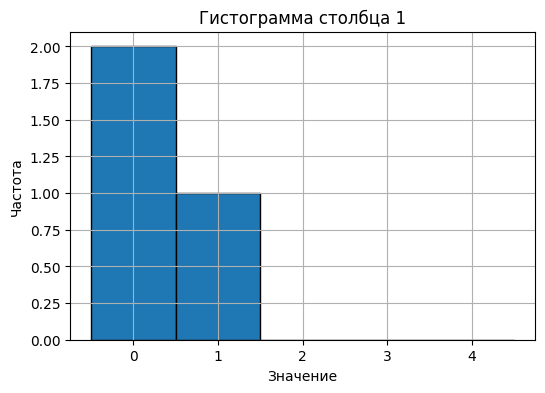

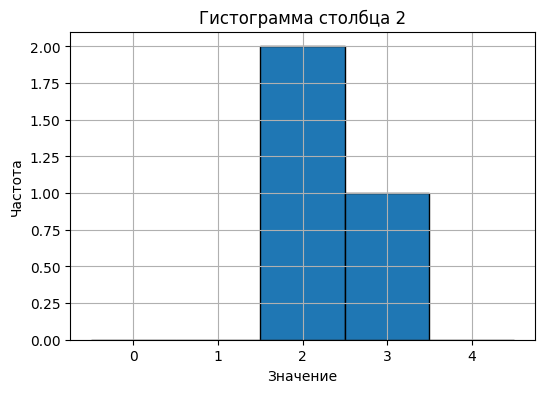

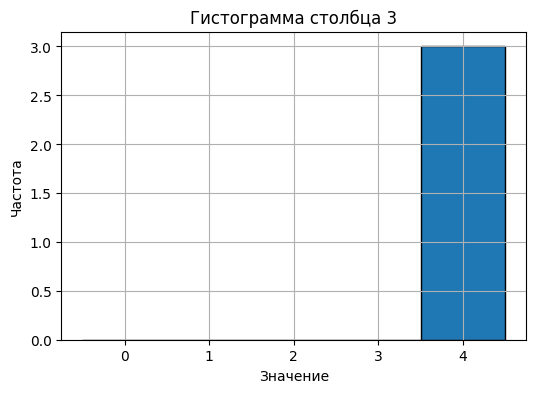

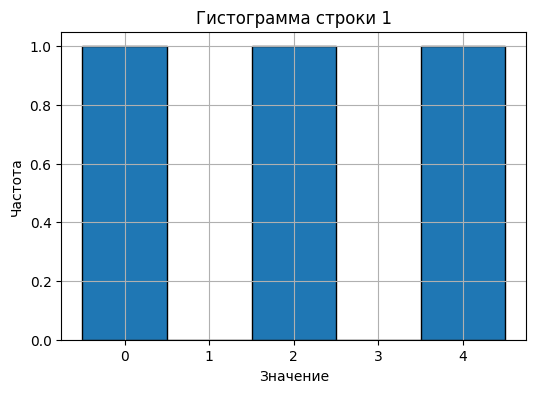

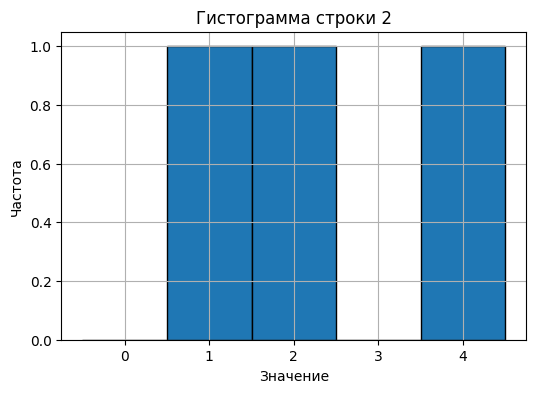

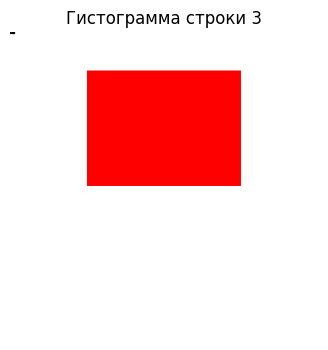

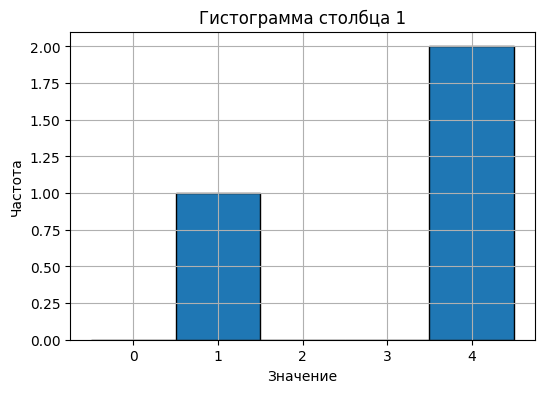

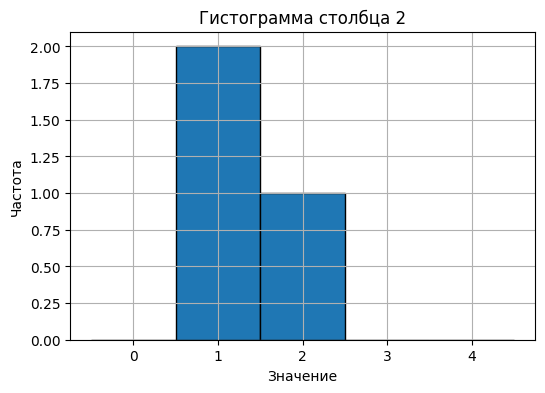

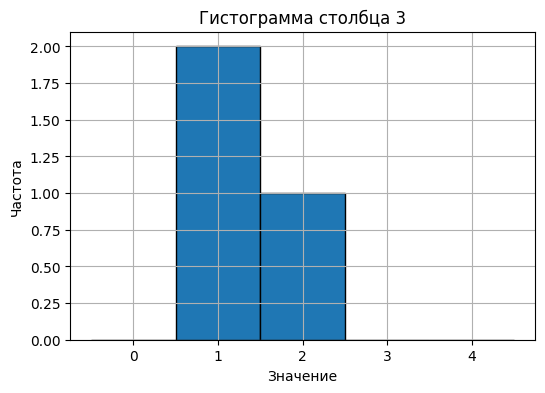

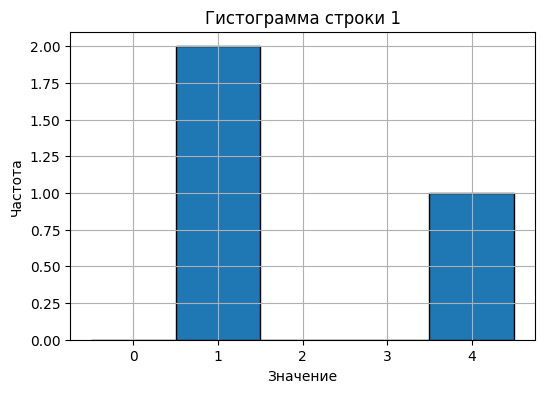

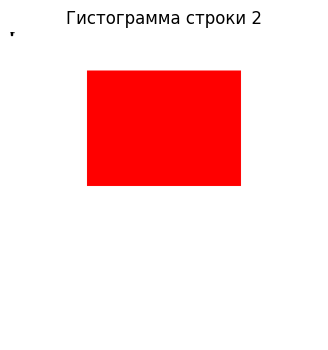

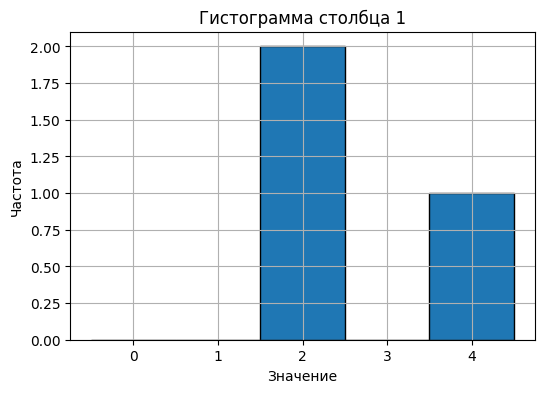

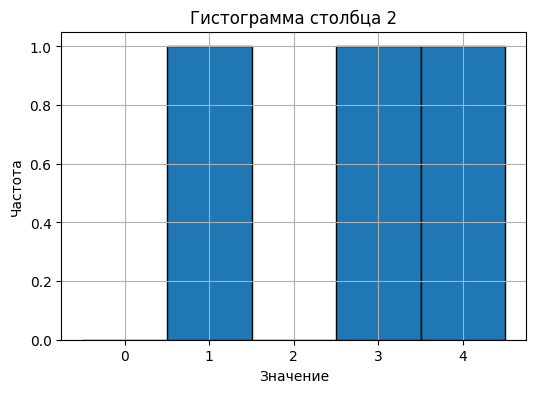

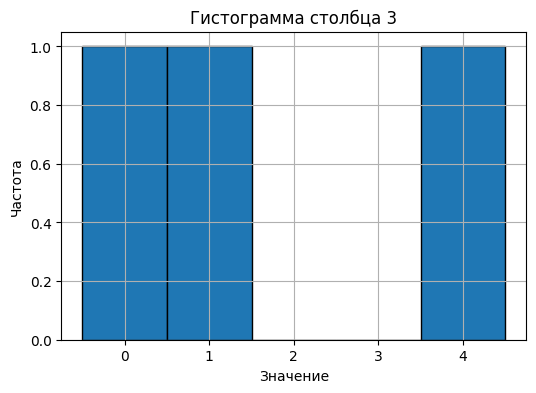

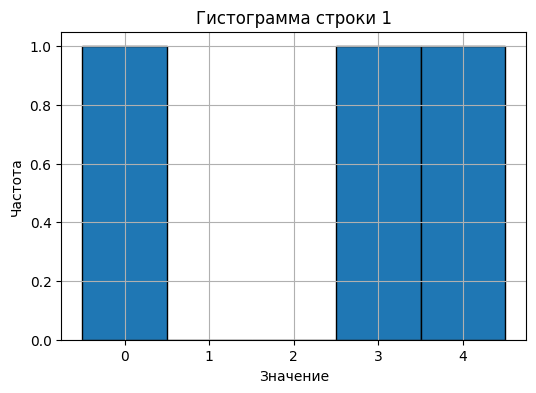

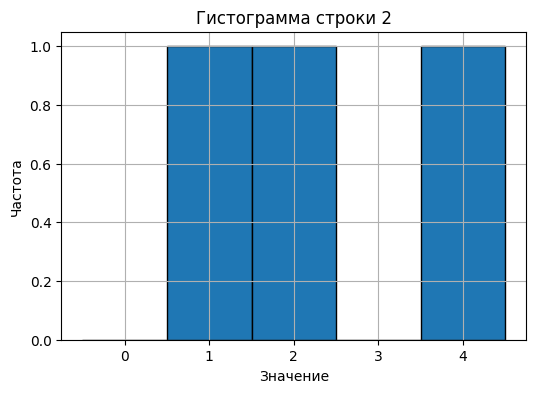

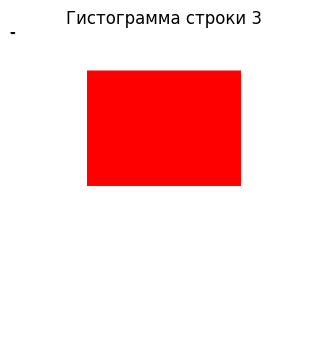

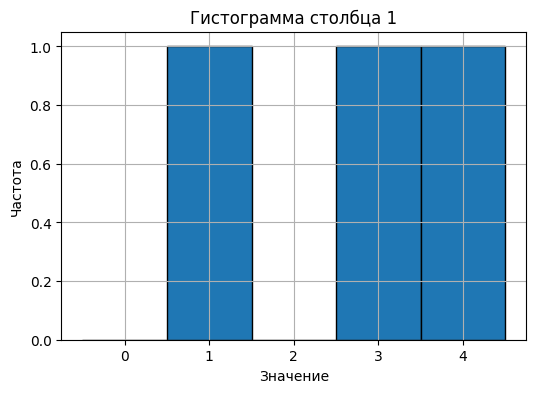

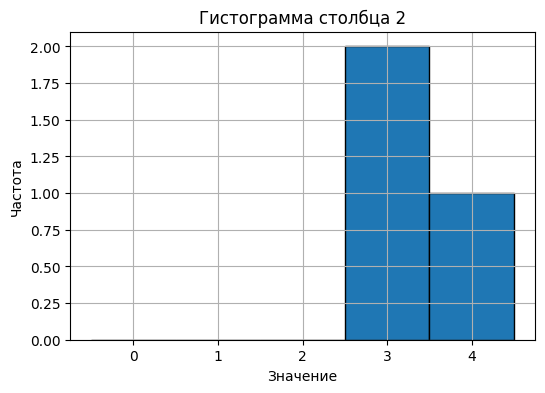

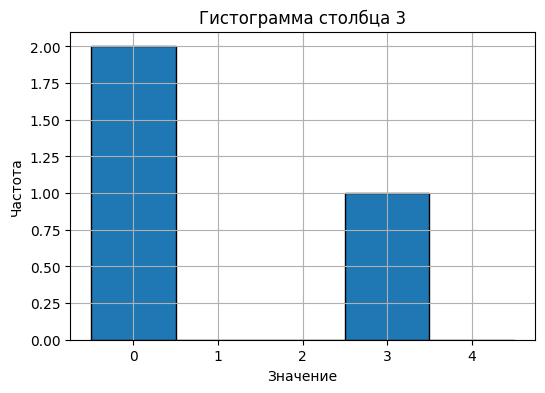

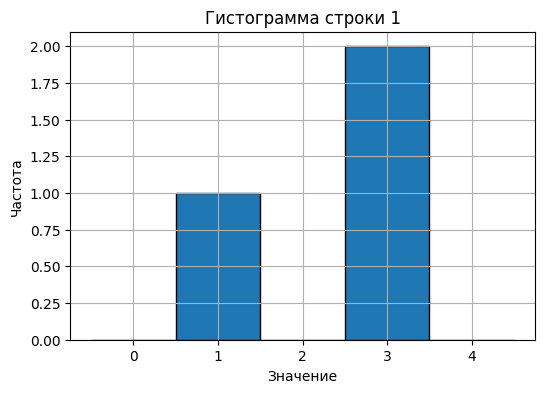

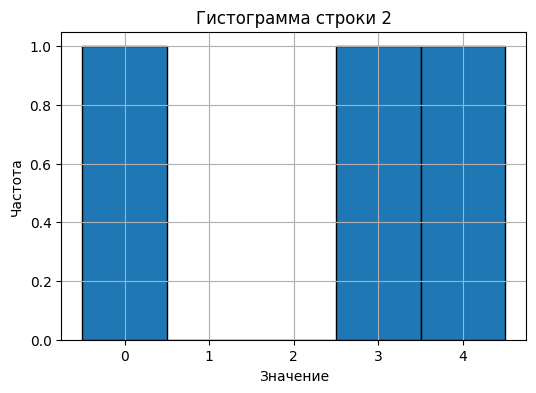

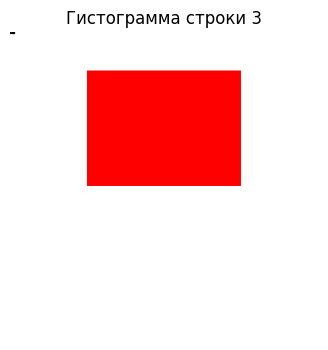

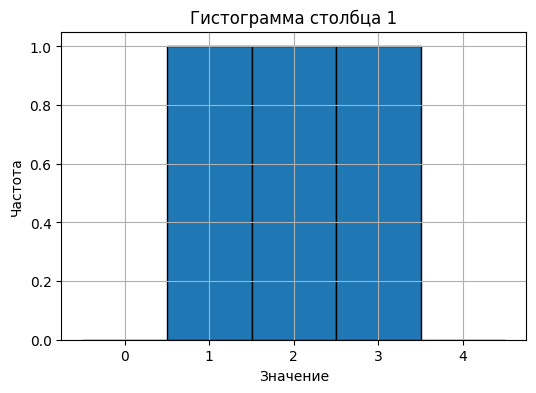

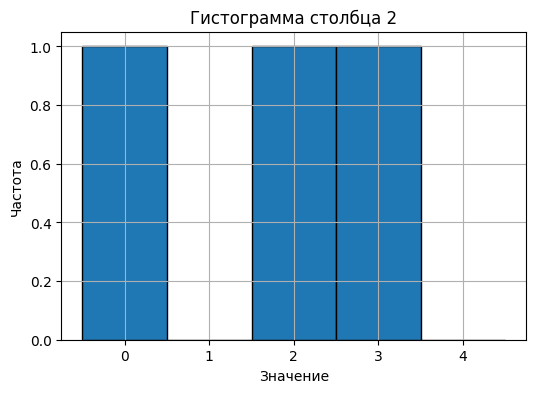

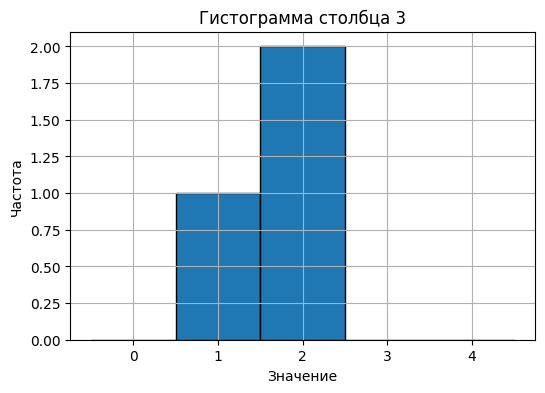

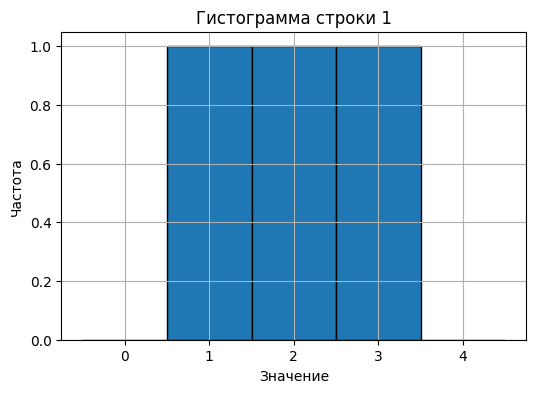

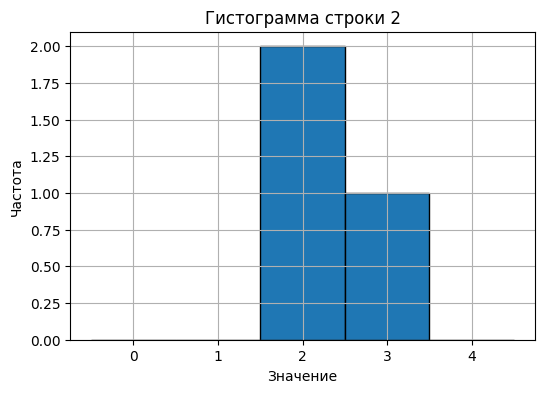

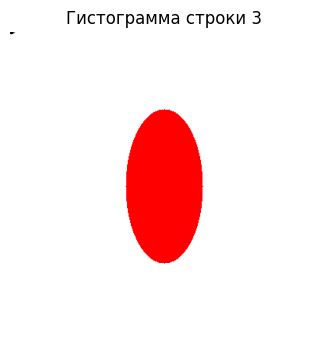

.

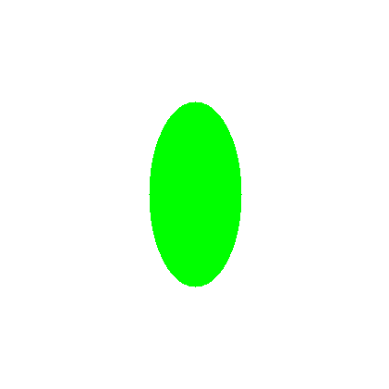

.

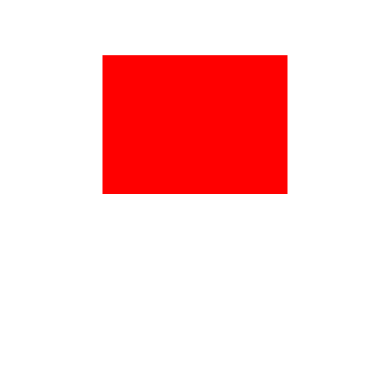

.

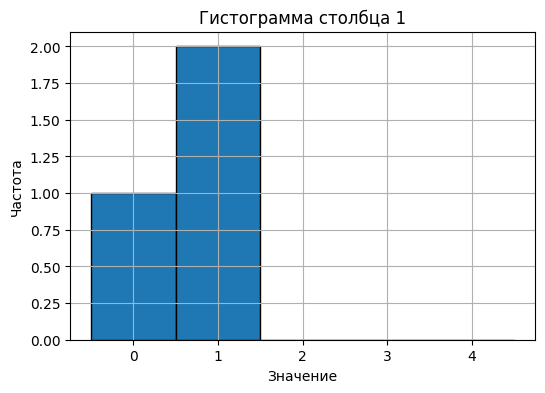

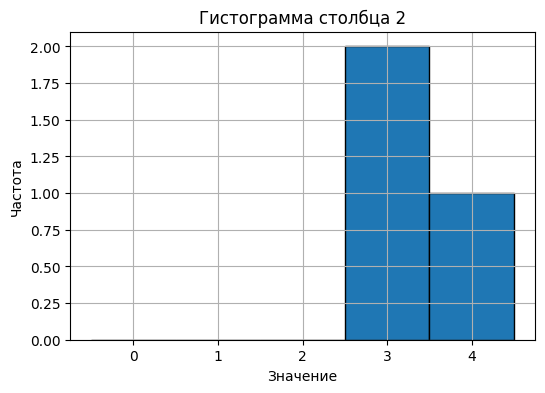

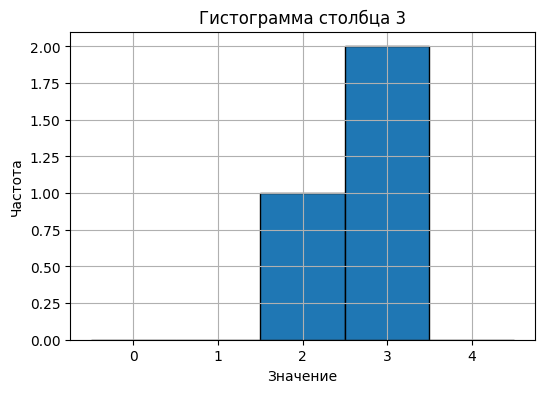

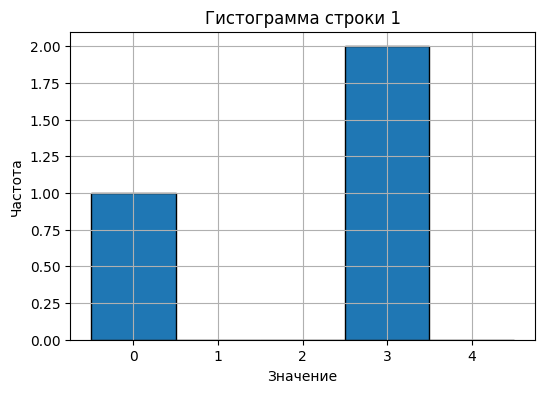

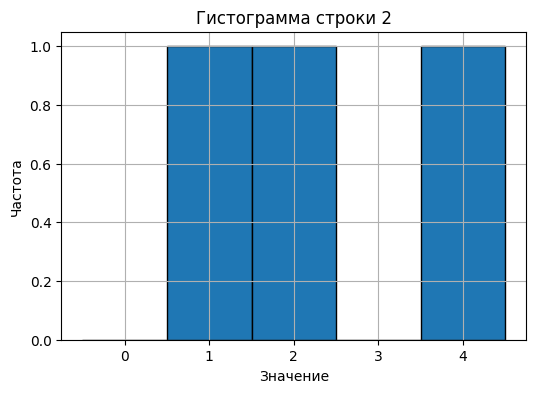

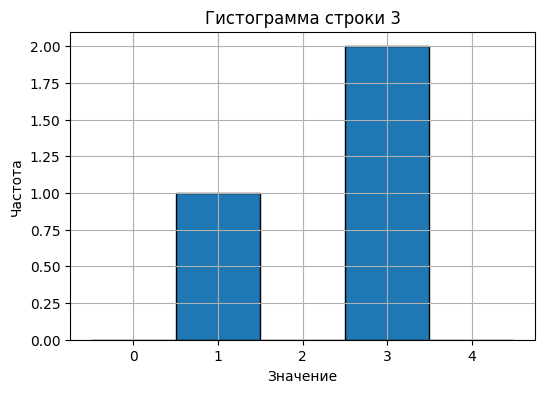

.
----------------------------------------------------------------------
Ran 4 tests in 1.718s

OK


In [22]:
%matplotlib inline

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3), dtype=int) * np.array(background_color)
    image[a[0]:a[1], b[0]:b[1]] = np.array(rectangle_color)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3), dtype=int) * np.array(background_color)
    Y, X = np.ogrid[:m, :n]
    mask = ((X - n // 2) ** 2) / (a ** 2) + ((Y - m // 2) ** 2) / (b ** 2) <= 1
    image[mask] = np.array(ellipse_color)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
class TestDrawingFunctions(unittest.TestCase):
    def test_rectangle(self):
        a = (50, 200)
        b = (100, 300)
        m, n = 400, 400
        rectangle_color = (255, 0, 0)
        background_color = (255, 255, 255)
        draw_rectangle(a, b, m, n, rectangle_color, background_color)

    def test_ellipse(self):
        a, b = 50, 100
        m, n = 400, 400
        ellipse_color = (0, 255, 0)
        background_color = (255, 255, 255)
        draw_ellipse(a, b, m, n, ellipse_color, background_color)

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [30]:
plt.switch_backend('Agg')

def analyze_time_series(data, window_size):
    data = np.array(data)
    avg = np.mean(data)
    variance = np.var(data)
    std_dev = np.std(data)

    peaks = []
    troughs = []
    for i in range(1, len(data)-1):
        if data[i] > data[i-1] and data[i] > data[i+1]:
            peaks.append(i)
        elif data[i] < data[i-1] and data[i] < data[i+1]:
            troughs.append(i)

    moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    return avg, variance, std_dev, peaks, troughs, moving_avg


if __name__ == "__main__":
    data_series = [1, 3, 2, 5, 7, 6, 4, 8, 9, 7, 5, 6, 4, 3, 2, 4, 5]
    window_size = 3
    avg, variance, std_dev, peaks, troughs, moving_avg = analyze_time_series(data_series, window_size)

    print(f"Математическое ожидание: {avg}")
    print(f"Дисперсия: {variance}")
    print(f"СКО: {std_dev}")
    print(f"Локальные максимумы: {peaks}")
    print(f"Локальные минимумы: {troughs}")
    print(f"Скользящее среднее: {moving_avg}")


Математическое ожидание: 4.764705882352941
Дисперсия: 4.650519031141869
СКО: 2.1565062093909835
Локальные максимумы: [1, 4, 8, 11]
Локальные минимумы: [2, 6, 10, 14]
Скользящее среднее: [2.         3.33333333 4.66666667 6.         5.66666667 6.
 7.         8.         7.         6.         5.         4.33333333
 3.         3.         3.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [31]:
def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot_matrix = np.eye(num_classes)[labels]
    return one_hot_matrix

if __name__ == "__main__":
    labels = [0, 2, 3, 0]
    one_hot_result = one_hot_encoding(labels)
    print(one_hot_result)


[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
